In [1]:
#!unzip tensortrade.zip
#!unrar x LOB1_NQU22-CME_1min_2PercentSum_100PercentOrders_Overlapped_20Jun2022_19Sep2022.rar

In [2]:
##get data from link
#!wget -O data.rar https://www.dropbox.com/sh/7unwg9pomo64ih7/AADdJESacvWKGQEDf0OgeUzAa/LOB1_NQU22-CME_10sec_200Levels_NoOverlap.rar?dl=0

In [3]:
## test if using gpu or not
# import tensorflow as tf
# tf.config.list_physical_devices('GPU')

In [4]:
# !pip install tabulate
# !pip install stable_baselines3
# !pip install gym
# !pip install deprecated
# !pip install stockstats
# !pip install zigzag
# !pip install unrar

In [1]:
##################### Base Libs #####################
from tensortrade.data.inputs import *
from tensortrade.data.feature_engineering import FeatureEngineering
from tensortrade.data.feature_engineering_OHLC import FeatureEngineering_ohlc
# from tensortrade.feed.core import DataFeed, Stream
# from tensortrade.oms.instruments import Instrument
# from tensortrade.oms.exchanges import Exchange, ExchangeOptions
# from tensortrade.oms.services.execution.simulated import execute_order
# from tensortrade.oms.wallets import Wallet, Portfolio
import tensortrade.env.default as default
import tensortrade.env.env_stocktrading_train as Environment_Train
import tensortrade.env.env_stocktrading_test as Environment_Test
################### Others ##########################
import numpy as np
import pandas as pd

In [2]:
'''


Data Ghathering



'''

'\n\n\nData Ghathering\n\n\n\n'

In [3]:
# see data path
print('Data Path is :',Data_Path)

Data Path is : C:/Users/kasra/Downloads/Ten-Surf/Tensurf-RL/data/LOB1_NQU22-CME_1min_2PercentSum_100PercentOrders_Overlapped_20Jun2022_19Sep2022.csv


In [4]:
# LOB Data
preProcessedData = FeatureEngineering(Data_Path,window_size,lob_percent,Test_Percentage,Normalization_mode)
LOB_Data_train_unnormal,LOB_Data_test_unnormal,LOB_Data_train,LOB_Data_test = preProcessedData.add_all_features()

In [5]:
# LOB Data
LOB_Data_train.head()

,Zscoreopen,Zscorehigh,Zscorelow,Zscoreclose,Zscorevolume,Zscorebid_volume,Zscoreask_volume,Zscorebid_number,Zscoreask_number,Zscoresum_lob_bid,...,Zscorepower_ratio_20min,Zscorebid_volume_20min,Zscoreask_volume_20min,Zscorecounter_ratio_20min,Zscorebid_number_60min,Zscoreask_number_60min,Zscorepower_ratio_60min,Zscorebid_volume_60min,Zscoreask_volume_60min,Zscorecounter_ratio_60min
2022-06-20 16:58:00,1.796160,1.833953,1.843944,1.915582,-0.692876,-0.875227,-0.480156,-0.860647,-0.463611,-0.141150,...,-1.156043,-0.391039,-0.005462,-1.392973,-0.717770,-0.630185,-1.295642,-0.743211,-0.626647,-1.312535
2022-06-20 16:59:00,1.910610,1.816244,1.779858,1.825584,-0.521923,-0.566379,-0.443561,-0.564748,-0.463220,0.543056,...,-1.154879,-0.351237,0.023836,-1.378136,-0.719058,-0.626339,-1.294416,-0.744296,-0.621367,-1.315694
2022-06-20 17:00:00,1.808892,1.750062,1.271643,1.460914,1.421695,1.609491,1.149456,1.771591,1.291864,1.026821,...,-1.154363,-0.179719,0.085535,-1.290731,-0.663145,-0.568755,-1.292345,-0.691335,-0.566982,-1.315088
2022-06-20 17:01:00,1.540769,1.866534,1.596988,1.840580,0.007897,-0.177555,0.170884,-0.112314,0.201379,0.964370,...,-1.153039,-0.144986,0.170390,-1.316197,-0.654991,-0.531953,-1.290064,-0.683713,-0.531364,-1.335814
2022-06-20 17:02:00,1.895082,1.800195,1.616433,1.751495,0.208423,0.808209,-0.336543,0.409780,-0.283328,0.474657,...,0.821421,-0.012960,0.185718,-1.241395,-0.615492,-0.512683,0.740676,-0.630813,-0.516260,-1.303150


In [6]:
## OHLC Data
# preProcessedData = FeatureEngineering_ohlc(Data_Path)
# Data_train_ohlc,Data_test_ohlc = preProcessedData.add_all_features()

In [7]:
# Data_train_ohlc.head()

In [8]:
''' 


Tarin Section


'''

' \n\n\nTarin Section\n\n\n'

In [9]:
# def create_env(config):
    
#     dataset = config["csv_filename"]
#     #ttse_commission = config['commission']  # exchange commission percentage of price
#     price = Stream.source(list(dataset["close"]), dtype="float").rename("USD-TTRD")
#     ttse_options = ExchangeOptions(commission = config['commission'])
#     ttse_exchange = Exchange("TTSE", service=execute_order, options=ttse_options)(price)

#  # Instruments, Wallets and Portfolio
#     USD = Instrument("USD", 2, "US Dollar") # symbol-precision-name
#     TTRD = Instrument("TTRD", 2, "TensorTrade Corp") # fake coin
#     cash = Wallet(ttse_exchange, 1000 * USD)  # This is the starting cash we are going to use
#     asset = Wallet(ttse_exchange, 0 * TTRD)  # And we will start owning 0 stocks of TTRD
#     portfolio = Portfolio(USD, [cash, asset])

#     # Renderer feed
#     renderer_feed = DataFeed([ 
#         Stream.source(list(dataset.index)).rename("date"),
#         Stream.source(list(dataset["bid_volume"]), dtype="float").rename("bid_volume"),
#         Stream.source(list(dataset["ask_volume"]), dtype="float").rename("ask_volume"),
#         Stream.source(list(dataset["bid_number"]), dtype="float").rename("bid_number"),
#         Stream.source(list(dataset["ask_number"]), dtype="float").rename("ask_number"),
#         Stream.source(list(dataset["sum_lob_bid"]), dtype="float").rename("sum_lob_bid"),
#         Stream.source(list(dataset["sum_lob_ask"]), dtype="float").rename("sum_lob_ask"),
#         Stream.source(list(dataset["sum_lob_ask_0.01"]), dtype="float").rename("sum_lob_ask_0.01"),
#         Stream.source(list(dataset["sum_lob_bid_0.01"]), dtype="float").rename("sum_lob_bid_0.01"),
#         Stream.source(list(dataset["sum_lob_ask_0.02"]), dtype="float").rename("sum_lob_ask_0.02"),
#         Stream.source(list(dataset["bid_volume_60min"]), dtype="float").rename("bid_volume_60min"),
#         Stream.source(list(dataset["power_ratio_60min"]), dtype="float").rename("power_ratio_60min"),
#         Stream.source(list(dataset["ask_number_60min"]), dtype="float").rename("ask_number_60min"),
#         Stream.source(list(dataset["bid_number_60min"]), dtype="float").rename("bid_number_60min"),
#         Stream.source(list(dataset["counter_ratio_20min"]), dtype="float").rename("counter_ratio_20min"),
#         Stream.source(list(dataset["ask_volume_20min"]), dtype="float").rename("ask_volume_20min"),
#         Stream.source(list(dataset["bid_volume_20min"]), dtype="float").rename("bid_volume_20min"),
#         Stream.source(list(dataset["power_ratio_20min"]), dtype="float").rename("power_ratio_20min"),
#         Stream.source(list(dataset["ask_number_20min"]), dtype="float").rename("ask_number_20min"),
#         Stream.source(list(dataset["bid_number_20min"]), dtype="float").rename("bid_number_20min"),
#         Stream.source(list(dataset["counter_ratio_5min"]), dtype="float").rename("counter_ratio_5min"),
#         Stream.source(list(dataset["ask_volume_5min"]), dtype="float").rename("ask_volume_5min"),
#         Stream.source(list(dataset["bid_volume_5min"]), dtype="float").rename("bid_volume_5min"),
#         Stream.source(list(dataset["power_ratio_5min"]), dtype="float").rename("power_ratio_5min"),
#         Stream.source(list(dataset["ask_number_5min"]), dtype="float").rename("ask_number_5min"),
#         Stream.source(list(dataset["bid_number_5min"]), dtype="float").rename("bid_number_5min"),
#         Stream.source(list(dataset["sum_lob_bid_0.005"]), dtype="float").rename("sum_lob_bid_0.005"),
#         Stream.source(list(dataset["sum_lob_ask_0.005"]), dtype="float").rename("sum_lob_ask_0.005"),
#         Stream.source(list(dataset["sum_lob_bid_0.02"]), dtype="float").rename("sum_lob_bid_0.02"),
#         Stream.source(list(dataset["ask_volume_60min"]), dtype="float").rename("ask_volume_60min"),
#         Stream.source(list(dataset["counter_ratio_60min"]), dtype="float").rename("counter_ratio_60min"),
#         Stream.source(list(dataset["orderbook0.005"]), dtype="float").rename("orderbook0.005")
#     ])

#     # Main feed
#     features = []
#     for c in dataset.columns[1:]:
#         s = Stream.source(list(dataset[c]), dtype="float").rename(dataset[c].name)
#         features += [s]

#     feed = DataFeed(features)
#     feed.compile()
    
#     # reward = config['Reward']
#     reward_scheme = getattr(default.rewards,config['Reward'])(window_size=config["reward_window_size"])
#     # action = config['Action']
#     action_scheme = getattr(default.actions,config['Action'])(cash=cash, asset=asset)
    
#     env = default.create(
#             feed=feed,
#             portfolio=portfolio,
#             action_scheme=action_scheme,
#             reward_scheme=reward_scheme,
#             renderer_feed=renderer_feed,
#             renderer=[],
#             window_size=config["window_size"],
#             max_allowed_loss=config["max_allowed_loss"]
#         )
    
#     return env

In [10]:
# env_config_training = {
#     "window_size": 7,  # We want to look at the last 14 samples (hours)
#     "reward_window_size": 5,  # And calculate reward based on the actions taken in the next 7 hours
#     "max_allowed_loss": 0.10,  # If it goes past 10% loss during the iteration, we don't want to waste time on a "loser".
#     "Action": selected_action ,
#     "Reward": selected_reward,
#     "commission": exchange_commission,
#     "csv_filename": LOB_Data_train_unnormal,  # The variable that will be used to differentiate training and validation datasets
# }

In [11]:
# my_env_train= create_env(env_config_training)

In [12]:
# func to create environment

def create_env_train(data,price,date,config):

    env= Environment_Train.StockTradingEnv_Train(data,price,date,config)
    
    return env

In [13]:
env_config_train = {
   "SEED":1,
   "zigzag_param_reward":0.0015,
   "zigzag_param":0.0015,
   "num_of_pivots":3,
   "lookback":800,
   "USE_LAST_ACTION":False,
   "WINDOW_NORMALIZE":False,
   "PRICE_AS_RETURN":False,
   "USE_CURRENT_PNL":False,
   "ADJUSTED_REWARD":False,     
   "REWARD_CALCULATION":"SharpRatio_based",
   "PRICE_CALCULATION_TYPE":"open",
   "MAX_NUM_SHARES":1,
   "MIN_PROFIT":0.05,
   "Exchange_Commission": 0.6,
   "STOP_LOSS":-10,
   "STOP_LOSS_COEF": 1,
   "REWARD_SCALING":5,
   "INITIAL_ACCOUNT_BALANCE":1000,
   "TIMESTEPS": 14
}

In [14]:
Time_Data = list(LOB_Data_train.index) # just time column

In [15]:
#Time_Data = list(LOB_Data_train.index) # just time column
Data=LOB_Data_train.reset_index(drop=True)

In [16]:
Price_Data = pd.DataFrame(LOB_Data_train[['Zscoreopen','Zscorehigh','Zscorelow','Zscoreclose']]) # just price related columns
Price_Data.rename(columns={'Zscoreopen': 'open', 'Zscorehigh': 'high', 'Zscorelow': 'low', 'Zscoreclose': 'close'}, inplace=True)

Price_Data.reset_index(drop=True,inplace=True)

In [17]:
env_train= create_env_train(Data,Price_Data,Time_Data,env_config_train)

In [18]:
#################################

In [19]:
# import agents
from stable_baselines3 import A2C,DQN
# import environment checker
from stable_baselines3.common import env_checker

In [20]:
# # check if environment meet gym policy
# env_checker.check_env(env_train , warn=False, skip_render_check=True)

In [24]:
policy_kwargs = dict(net_arch=[64,128, dict(vf=[32,64,128,256], pi=[32,64,128,256])])

RL_model = A2C("MlpPolicy", env_train, verbose=1,learning_rate=0.0005, policy_kwargs=policy_kwargs)
RL_model.learn(total_timesteps=5000)
#RL_model.save("RlSurf-A2C")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 120      |
|    iterations         | 100      |
|    time_elapsed       | 4        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.375   |
|    explained_variance | -0.00176 |
|    learning_rate      | 0.0005   |
|    n_updates          | 99       |
|    policy_loss        | -0.412   |
|    value_loss         | 17.4     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 661      |
|    ep_rew_mean        | 91.2     |
| time/                 |          |
|    fps                | 128      |
|    iterations         | 200      |
|    time_elapsed       | 7        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss 

In [25]:
'''


Test Section


'''

'\n\n\nTest Section\n\n\n'

In [26]:
env_config_test = {
   "SEED":1,
   "num_of_pivots":3,
   "lookback":800,
   "USE_LAST_ACTION":False,
   "WINDOW_NORMALIZE":False,
   "PRICE_AS_RETURN":False,
   "USE_CURRENT_PNL":False,   
   "PRICE_CALCULATION_TYPE":"open",
   "MAX_NUM_SHARES":1,
   "MIN_PROFIT":0.05,
   "Exchange_Commission": 0.6,
   "STOP_LOSS":-10,
   "STOP_LOSS_COEF": 1,
   "INITIAL_ACCOUNT_BALANCE":1000,
   "TIMESTEPS": 14
}

In [27]:
# func to create test environment

def create_env_test(data,price,date,config):

    env= Environment_Test.StockTradingEnv_Test(data,price,date,config)

    return env

In [28]:
Data_Test=LOB_Data_test.reset_index(drop=True)

In [29]:
Price_Data_Test = pd.DataFrame(LOB_Data_test_unnormal[['open','high','low','close']]) # just price related columns
Price_Data_Test.reset_index(drop=True,inplace=True)

In [30]:
Time_Data_Test = list(LOB_Data_test.index) # just time column

In [77]:
# Data_Test= Data_test_ohlc.drop(['time'],axis=1) # all of columns except time
# Data_Test.reset_index(drop=True,inplace=True)
# Price_Data_Test = pd.DataFrame(Data_test_ohlc[['open','high','low','close']]) # just price related columns
# Price_Data_Test.reset_index(drop=True,inplace=True)
# Time_Data_Test = list(Data_test_ohlc['time']) # just time column

env_test =  ENVV(Data_Test,Price_Data_Test,Time_Data_Test,env_config_test)

In [78]:
obs = env_test.get_state()    # we should not reset env manullay
number_candle=0 
# save actions in list to combine it with other models results

while True: 
  
    #obs = (obs).reshape(-1)
    action, _states = RL_model.predict(obs)
    #print(action)
    number_candle+=1
    obs, rewards, done, info = env_test.step(action)
    #print(done)

    if done:

        if env_test.day_index>= len(env_test.day_indices)-1:
                print("Account Balance Is : ", info['account_status'])
                
                break

        else:
             print('episode(Day) is : ',env_test.episode)
             env_test.reset()
       
        

episode(Day) is :  0
episode(Day) is :  1
episode(Day) is :  2
episode(Day) is :  3
episode(Day) is :  4
Account Balance Is :  1812.1500000000037


In [79]:
print('Total Number Of Passed Candles :',number_candle)

Total Number Of Passed Candles : 7906


In [80]:
print('Total Days:',env_test.episode+1)

Total Days: 6


In [81]:
(env_test.tradeslist)

,entry date,entry price,action,exit date,exit price,pnl,cum_pnl,mae,mpe
0,2022-07-11 19:59:00,0.00,0,2022-07-11 19:59:00,0.00,0.00,1000.00,0.00,0.00
1,NaT,11817.75,0,2022-07-11 20:13:00,11794.25,0.00,1000.00,0.00,0.00
2,2022-07-11 20:13:00,11794.25,1,2022-07-12 04:38:00,11897.25,102.40,1102.40,-36.00,-2.75
3,2022-07-12 04:38:00,11897.25,-1,2022-07-12 05:01:00,11885.75,10.90,1113.30,-9.00,-9.75
4,2022-07-12 05:01:00,11885.75,1,2022-07-12 05:25:00,11881.50,-4.85,1108.45,-20.00,-15.00
5,2022-07-12 05:25:00,11881.50,-1,2022-07-12 07:01:00,11822.25,58.65,1167.10,-144.00,-1.75
6,2022-07-12 07:01:00,11822.25,1,2022-07-13 02:46:00,11815.00,-7.85,1159.25,-110.25,-127.00
7,2022-07-13 02:46:00,11815.00,-1,2022-07-13 02:49:00,11815.75,-1.35,1157.90,-3.00,-1.25
8,2022-07-13 02:49:00,11815.75,1,2022-07-13 08:28:00,11755.25,-61.10,1096.80,-336.50,-214.75
9,2022-07-13 08:28:00,11755.25,-1,2022-07-13 08:29:00,11744.00,10.65,1107.45,-2.00,-2.00


In [82]:
# env_test.trade_history()

+---------+----------+------------------+---------+-----------------+----------------+---------------------------------------+
|   long# |   short# |   Cumulative PnL |    PROM |   Profit factor |   max drawdown | PnLs                                  |
+=========+==========+==================+=========+=================+================+=======================================+
|      21 |       20 |          1812.15 | 11.7413 |         6.28916 |          -70.3 | 965.6999999999998 -153.54999999999998 |
+---------+----------+------------------+---------+-----------------+----------------+---------------------------------------+


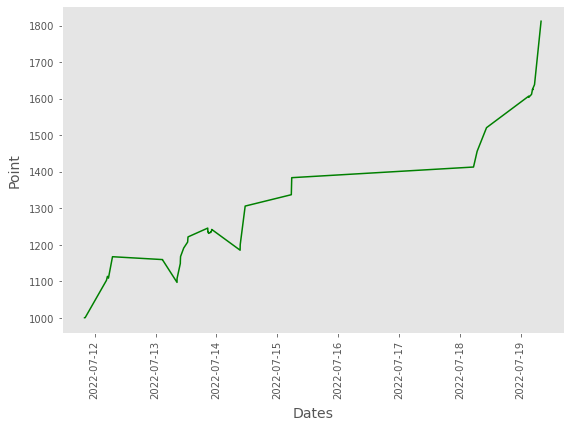

<Figure size 432x288 with 0 Axes>

In [83]:
env_test.show_results()

In [84]:
# ################ Libs ##############
# import numpy as np
# import pandas as pd
# from gym.utils import seeding
# import gym
# from gym import spaces
# import matplotlib
# import matplotlib.pyplot as plt
# from stable_baselines3.common.vec_env import DummyVecEnv
# from stockstats import StockDataFrame 
# from zigzag import peak_valley_pivots
# from tabulate import tabulate
# ################################

# """
# A custom stock trading environment based on OpenAI gym (Test Env)

# """

# class ENVV(gym.Env):

#     def __init__(self,df, price_data, date, config):

#         self.data = df
#         self.config = config
#         self.price_data = price_data
#         self.price_data['action'] = 0   # make action column in price data to save each action
#         self.atr = StockDataFrame.retype(price_data.copy())['atr'] # calculate atr indicator
#         self.timesteps = self.config["TIMESTEPS"] 
#         self.action_space = spaces.Discrete(3) # define action space
#         self.state_space = (self.action_space.n * config["USE_LAST_ACTION"]) + 2 * config[ 
#             "USE_CURRENT_PNL"] + self.timesteps * len(df.columns)  # define states space
        
#         self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.state_space,)) # don't change this line !!!
#         self.num_of_shares = config["MAX_NUM_SHARES"]
#         self.date = date # date of dataframe

#         daily = pd.to_datetime([pd.to_datetime(x) - pd.Timedelta(hours=15) for x in self.date]).floor('d') # specify day indexes
#         daily = pd.DataFrame(daily, columns=['date'])
#         self.day_indices = [x.total_seconds() for x in daily['date'] - daily['date'].shift(1)]
#         self.day_indices = [i for i, v in enumerate(self.day_indices) if v != 0]
#         self.day_indices = self.day_indices[1:] 
#         self.day_indices[0] = self.timesteps 

#         self.current_point = self.day_indices[0] 
#         self.day_index = 0 
#         self.current_position = 0
#         self.last_action = 0
#         self.entry_index = 0
       
#         self.spread_cost = config["Exchange_Commission"]    # set exchange commission
        
#         self.base_account = config["INITIAL_ACCOUNT_BALANCE"]
#         # self.previous_price = 0
#         # self.current_price = 0
#         # self.next_price = 0
#         self.episode = 0
#         self.account = self.base_account
#         # memorize all the total balance change
#         self.entry_date = None
#         self.tradeslist = pd.DataFrame( 
#             columns=['entry date', 'entry price', 'action', 'exit date', 'exit price', 'pnl','cum_pnl', 'mae', 'mpe'])
#         self.tradeslist.loc[0] = [self.date[0],0, 0,
#         self.date[0], 0,0, self.account, 0, 0 ]
#         self._seed()
#         self.positives = 0    # ?
#         self.negatives = 0    # ?
       

#     '''
#     func to determine stop loss base on zigzag indicator

#     '''
#     def find_pivots(self, action):

#         pivot_param = .002
#         step = .0005
#         lookback = self.config['lookback']
#         data = self.price_data['close'][max(0, self.current_point - lookback):self.current_point].to_numpy()
#         pivots = peak_valley_pivots(data, pivot_param, -pivot_param)
#         condition = -action
#         current_price = self.price_data['close'][self.current_point - 1]
#         if np.sum(pivots == condition) and condition * current_price < condition * data[
#             np.where(pivots == condition)[0][-1]]:
#             return abs(current_price - data[np.where(pivots == condition)[0][-1]])
#         else:
#             return self.config["STOP_LOSS_COEF"] * self.atr[self.current_point]     

#     '''
#     func to get date

#     '''
#     def get_date(self):
        
#         try:
#             return self.date[self.current_point]
#         except:
#             pass

#     '''
#     func to get price

#     '''
#     def get_price(self, point):

#         price_type = self.config["PRICE_CALCULATION_TYPE"]

#         if price_type == 'mid':
#             return self.price_data.loc[point, ['open', 'low', 'high', 'close']].mean()
#         elif price_type == 'close':
#             return self.price_data.loc[point,'close']
#         elif price_type=='open':
#             return self.price_data.iloc[point]['open']

#     '''
#     func to calculate PNL

#     '''
#     def calculate_pnl(self, action, previous_price, current_price, spread=True):

#         if  action==0:  # if action be 0(hold) pnl will be 0 
#             return 0

#         diff_price = current_price - previous_price

#         if spread:
#             return (action * diff_price - self.spread_cost * spread ) * self.num_of_shares
#         else:
#             return (action * diff_price ) * self.num_of_shares
             
#     '''
#     func to calculate reward

#     '''
#     def calculate_reward(self,current_position, new_action, current_point, previous_point):

#         previous_price = self.get_price(previous_point)
#         current_price = self.get_price(current_point)
#         next_price = self.get_price(current_point + 1)
#         profit_loss = self.calculate_pnl(current_position, previous_price, current_price)
#         profit_loss = (profit_loss if (current_position != new_action and new_action!=0) else 0)    # ignore profit_loss if new action be same as previous action
#         min_price = self.price_data['low'][previous_point:current_point].min()
#         max_price = self.price_data['high'][previous_point:current_point].max()
        
#         if current_position == 1:
#             MAE = self.calculate_pnl(current_position, previous_price, min_price, spread=False)
#             MPE = self.calculate_pnl(current_position, max_price, current_price, spread=False)
#         elif current_position == -1:
#             MAE = self.calculate_pnl(current_position, previous_price, max_price, spread=False)
#             MPE = self.calculate_pnl(current_position, min_price, current_price, spread=False)
#         else:
#             MAE = 0
#             MPE = 0

#         return profit_loss, MAE, MPE

#     '''
#     func to calculate account PNL in percent

#     '''
#     def calculate_benefit(self):

#         action = self.current_position
#         profit_loss = self.calculate_pnl(action, self.get_price(self.entry_index),
#                                          self.get_price(self.current_point))
#         acount_pnl_percentage = (self.base_account + profit_loss) / self.base_account

#         return (acount_pnl_percentage - 1), profit_loss

#     '''
#     func to get environment state

#     '''
#     def get_state(self):

#         s_ = self.data.iloc[self.current_point - self.timesteps:self.current_point , :]
#         if self.config["WINDOW_NORMALIZE"]:
#             for column_name in ['close', 'low', 'high', 'open']:
#                 if column_name in s_.columns:
#                     window_data = self.price_data.iloc[self.current_point - self.timesteps:self.current_point ,
#                                   column_name]
#                     min_val = np.min(window_data)
#                     max_val = np.max(window_data)
#                     s_[column_name] = (window_data - min_val) / (max_val - min_val)
#         s_ = s_.values.reshape(-1)
#         # print(self.current_point, self.timesteps, s_.shape)
#         extended_data = np.zeros(
#             self.action_space.n * self.config["USE_LAST_ACTION"] + 2 * self.config["USE_CURRENT_PNL"])
#         if self.config["USE_LAST_ACTION"]:
#             extended_data[self.current_position + 1] = 1
#         if self.config["USE_CURRENT_PNL"]:
#             benefit, pnl = self.calculate_benefit()
#             # if benefit:
#             # s   benefit = np.sign(benefit)
#             extended_data[-1] = benefit
#             extended_data[-2] = ((pnl + self.account) / self.base_account - 1) * 10
#         st = np.expand_dims(np.append(s_, extended_data), 0)
       
#         return st

#     '''
#     func to step action on environment 

#     '''
#     def step(self, action):
        
#         doned_action = int(action) - 1    # action space should be in (-1,0,1)
#         reward=0
#         self.price_data.loc[self.current_point,'action']= doned_action
#         # last_action = (self.tradeslist)['action'][len(self.tradeslist)-1]
#         done = 0
#         # self.current_price = self.next_price
#         # self.next_price = self.get_price(self.current_point + 1)
#         if (self.day_index < len(self.day_indices)-1 and self.current_point == self.day_indices[self.day_index+1] -1 ) or \
#                 self.current_point == len(self.data) - 2:
#             done = 1 
#             # doned_action = 0
            
#         # if doned_action == self.current_position and self.current_position:
#         #     previous_price = self.get_price(self.entry_index)
#         #     current_price = self.get_price(self.current_point)
#         #     diff = current_price - previous_price
#         #     temp = (doned_action * diff - self.spread_cost) * self.num_of_shares
#         #     # Check stop loss
#         #     sl = self.find_pivots(doned_action)
#         #     if temp < -sl:
#         #         doned_action = 0
#         #         print('############################  Stop loss')
#         profit_loss, MAE, MPE = self.calculate_reward(self.last_action,doned_action, self.current_point,self.entry_index)
  
#         if profit_loss:
            
#             if profit_loss > 0:
#                 self.positives += profit_loss
#             else:
#                 self.negatives += profit_loss
#             self.account += profit_loss

       
#         if doned_action!=0 and self.last_action!= doned_action :
          
#             #print('action:',doned_action,'position:',self.current_position)
#             self.tradeslist.loc[len(self.tradeslist)] = [self.entry_date, self.get_price(self.entry_index),
#                                                         self.last_action, self.get_date(),
#                                                         self.get_price(self.current_point), profit_loss,self.account, MAE,
#                                                         MPE]
#             self.entry_index = self.current_point
#             self.entry_date = self.get_date()

#             self.last_action= doned_action
    
#         # if  doned_action != self.last_action:
#         #         self.entry_index = self.current_point
#         #         self.entry_date = self.get_date()
#                 # self.previous_price = self.current_price
        
#         self.current_position = doned_action
        
#         if self.account <= 0:
#             done = 1
            
#         self.current_point += 1
       
#         s_ = self.get_state()
      
#         return s_, float(reward), done, {"account_status":self.account}

#     '''
#     func to reset environment

#     '''
#     def reset(self):

#         self.positives = 0
#         self.negatives = 0
#         self.day_index +=1
#         self.current_point = self.day_indices[self.day_index]
    
#         #self.make_plot() # plot result at the end of each day(episode)
#         self.episode += 1
       
#         self.current_position = 0
#         self.entry_index = self.current_point

#         return self.get_state()

#     '''
#     func to ?

#     '''
#     def _seed(self, seed=None):     # we want to start with same arameters each time
#         self.np_random, seed = seeding.np_random(seed)
#         return [seed]
        
#     '''
#     func to ?

#     '''
#     def get_sb_env(self):     
#         e = DummyVecEnv([lambda: self])
#         obs = e.reset()
#         return e, obs


#     '''
#     func to plot result

#     '''
#     def make_plot(self):
#         plt.plot(self.tradeslist['pnl'], 'g')   # plot PNL from trade list
#         plt.savefig('results/PNL.png')      # save plot as png
#         plt.close()
    
#     '''
#     func to save actions that has been taken on each step

#     '''
#     def trade_history(self):

#         self.price_data.to_csv('actiones_taked.csv')

#         return self.tradeslist


#     '''
#     func to get results of backtesting

#     '''
#     def show_results(self):

#         results= self.tradeslist.copy()
#         #results['cum_pnl'] = results['pnl'].cumsum()
#         initial_balance= self.base_account
       
#         cagr_dd = -20
#         pf = 0
#         pessimistic_return_on_margin = -10
#         if len(results):
#             pos = np.sum(results['pnl'][results['pnl'] > 0])
#             neg = np.sum(results['pnl'][results['pnl'] < 0])
#             long_num = len(results['action'][results['action'] == 1])
#             short_num = len(results['action'][results['action'] == -1])
#             cagr = float(results['cum_pnl'][-1:])
#             max_drawdown = np.min(
#                 results['cum_pnl'] - results['cum_pnl'].rolling(len(results), min_periods=1).max())
#             mean_drawdown = -np.mean(
#                 results['cum_pnl'] - results['cum_pnl'].rolling(len(results), min_periods=1).max())
#             cagr_dd = cagr / mean_drawdown if mean_drawdown != 0 else cagr
#             pf = pos / -neg if neg else np.sum(results['pnl'] > 0)
#             margin = 50
#             average_win = 0
#             average_loss = 0
#             winning_trades = len(results[results['pnl'] > 0].index)
#             losing_trades = len(results[results['pnl'] < 0].index)
#             if winning_trades:
#                 average_win = pos / winning_trades
#             if losing_trades:
#                 average_loss = - neg / losing_trades
#             adjusted_num_of_wins = winning_trades - winning_trades ** .5
#             adjusted_num_of_losses = losing_trades + losing_trades ** .5
#             adjusted_profit = average_win * adjusted_num_of_wins
#             adjusted_loss = average_loss * adjusted_num_of_losses
#             pessimistic_return_on_margin = (adjusted_profit - adjusted_loss) / margin
#             print(tabulate(
#                 {"long#":[long_num], "short#":[short_num], "Cumulative PnL": [cagr], "PROM": [pessimistic_return_on_margin],
#                 "Profit factor": [pf], "max drawdown": [max_drawdown], "PnLs": {str(pos) + ' ' + str(neg)}}, headers="keys", tablefmt="grid"))
                
#             plt.figure(figsize=(9,6))
#             plt.plot(results['exit date'],results['cum_pnl'] , color ='green', markersize=4)
#             plt.grid()
#             plt.ylabel('Point', labelpad = 8, fontsize = 14)
#             plt.xlabel('Dates', labelpad = 8, fontsize = 14)
#             plt.xticks(rotation=90)
#             plt.show()
#             plt.savefig('results/PNL.png') 